# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('house_sales.csv')

# Replace non-string values with NaN
df['city'] = df['city'].apply(lambda x: x if isinstance(x, str) else np.nan)

# Replace strings that can be converted to float with NaN
df['city'] = df['city'].apply(lambda x: x if not x.replace('.', '', 1).isdigit() else np.nan)

# Replace strings with characters that are not alphabetic with NaN
df['city'] = df['city'].apply(lambda x: x if x.isalpha() else np.nan)

# Replace non-standard missing values with NaN
df['city'].replace(['-', 'missing', 'unknown'], np.nan, inplace=True)

# Count the number of missing values in the 'city' column
missing_city = df['city'].isnull().sum()

# Output the result
print(missing_city)
#passed test

73


# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

In [2]:
#check missing values in the data frame
clean_data = df
clean_data.isnull().sum()

house_id          0
city             73
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64

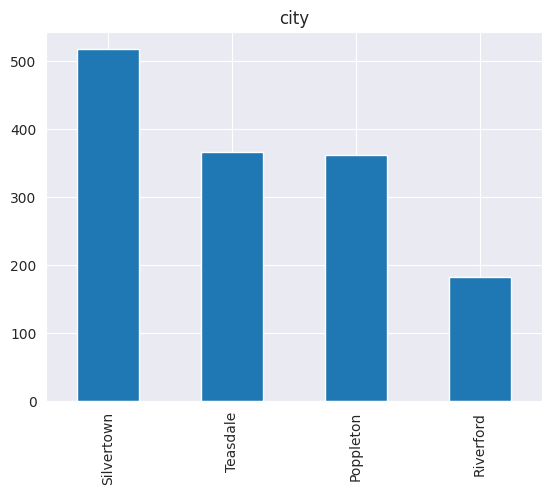

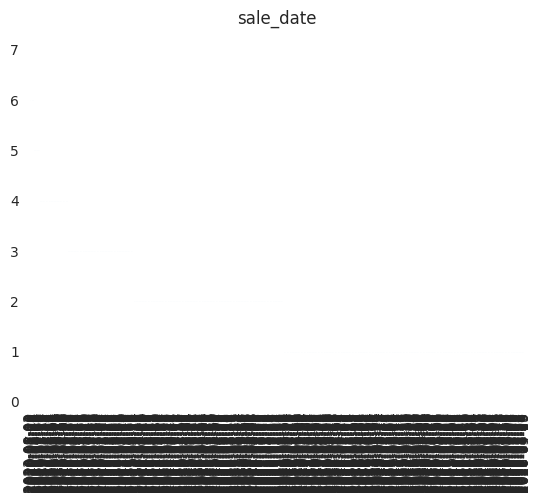

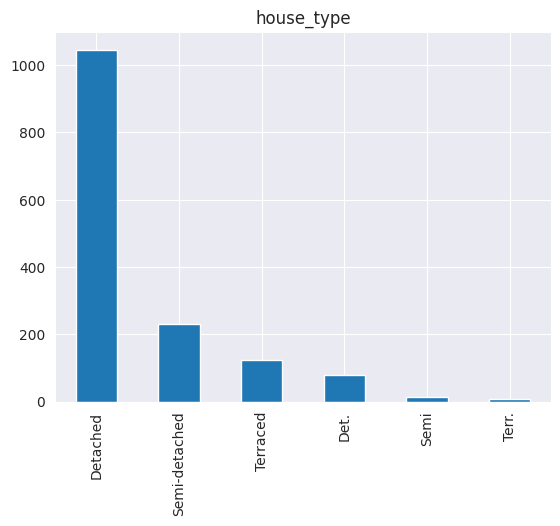

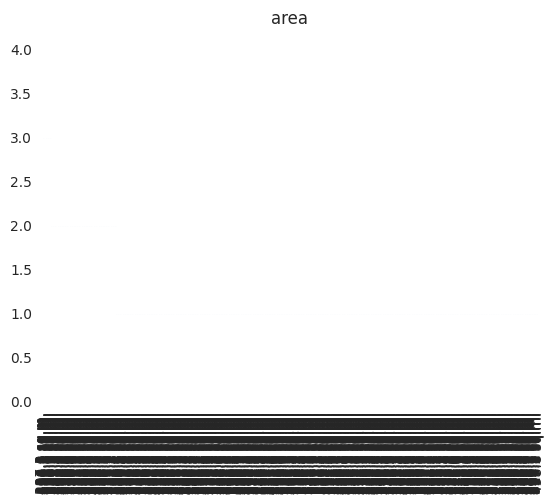

In [3]:
import matplotlib.pyplot as plt
# make a plot for the categorical variables
for column in clean_data.select_dtypes(include=['object']):
    clean_data[column].value_counts().plot(kind='bar', title=column)
    plt.show()

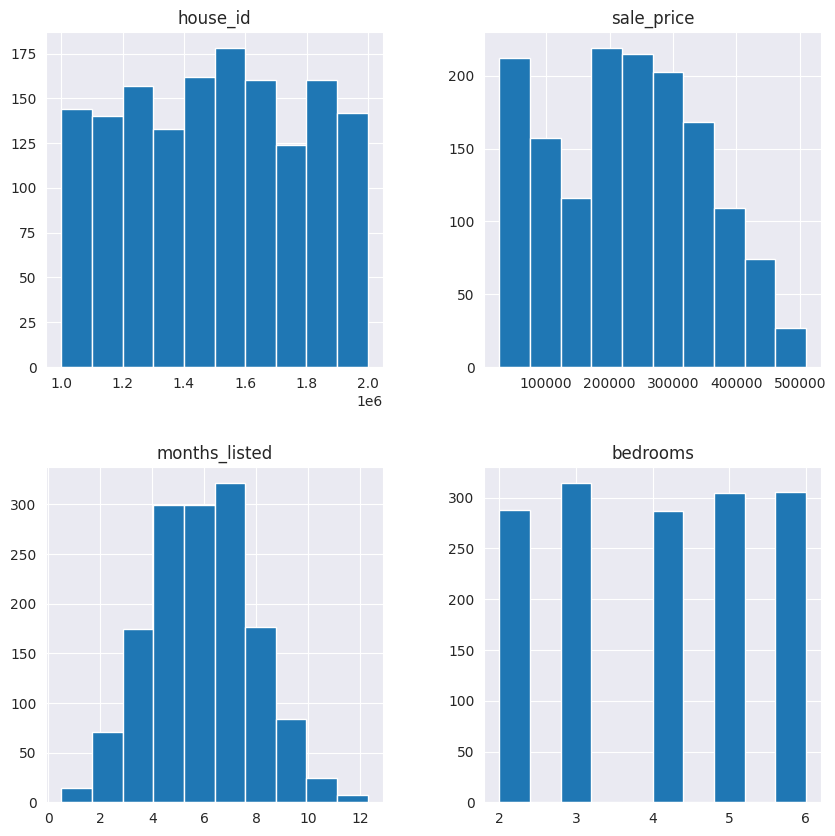

In [4]:
# Analysis of continuous variables
clean_data.hist(figsize=(10, 10))
plt.show()

In [5]:
columns = clean_data.columns
for col in columns:
    if col == 'house_id' or col =='sale_date':
        continue
    print(f"Column: {col}", clean_data[col].dtype, clean_data[col].unique())

Column: city object ['Silvertown' 'Riverford' 'Teasdale' 'Poppleton' nan]
Column: sale_price int64 [ 55943 384677 281707 ... 176612 197827 162099]
Column: months_listed float64 [ 5.4  6.3  6.9  6.1  8.7  5.1  nan  5.8  4.4  3.   4.6  3.7  6.2  5.3
  3.5  5.   5.5  7.8  4.9  4.7  8.9  5.9  3.8  4.8  7.6  6.4  7.9  6.6
  4.1  7.4  7.1  6.7  3.9  4.3  8.1  6.5  7.7  5.2  2.6  4.2  1.2  8.
  5.6  3.3  7.3  9.4  8.8  6.   3.6  3.2  8.5  4.5 10.4  9.2  1.7 10.2
  0.8  5.7  2.   2.3  8.6  7.5  9.6  9.7  6.8  2.2  2.5  4.   8.3 10.7
  2.7  3.4  7.   9.1  2.8  8.2 11.4 10.   2.9 10.1  7.2 10.5  9.9  3.1
  9.3  9.   1.3  8.4 11.   1.9 12.3  9.5  2.1  9.8  2.4  0.5 11.5  1.8
  1.6  1.5 10.8  1.4 11.6 10.3 10.6  0.6 11.3 11.7 11.8  1.1  1.  10.9]
Column: bedrooms int64 [2 5 6 4 3]
Column: house_type object ['Semi-detached' 'Detached' 'Det.' 'Terraced' 'Semi' 'Terr.']
Column: area object ['107.8 sq.m.' '498.8 sq.m.' '542.5 sq.m.' ... '432.2 sq.m.' '253.7 sq.m.'
 '268.7 sq.m.']


In [6]:
for id in clean_data["house_id"]:
    assert type(id) == int
print("passed")

passed


In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1427 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1469 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


<Axes: >

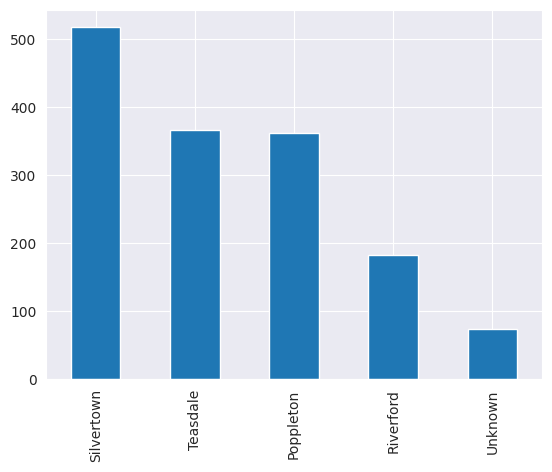

In [8]:
#For City
#replace city nan values with Unkown
clean_data['city'] = clean_data['city'].fillna('Unknown')
clean_data['city'] = clean_data['city'].str.title()
clean_data['city'] = clean_data['city'].apply(lambda x: x.strip())
wrong_cat = {"Det.": "Detached", "Semi": "Semi-Detached"}
clean_data["city"] = clean_data["city"].replace(wrong_cat)

clean_data["city"].value_counts().plot(kind = "bar")

<Axes: title={'center': 'House Type'}>

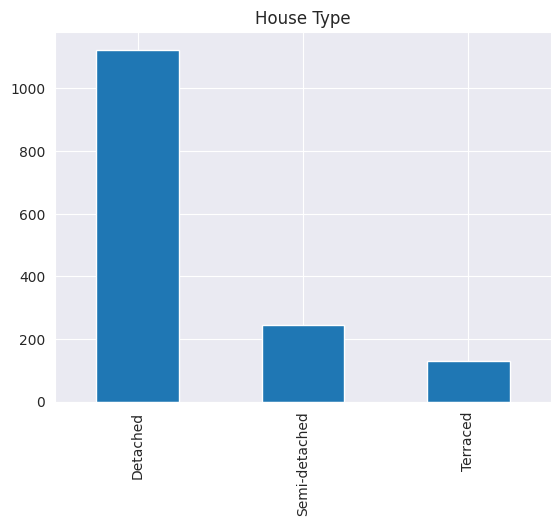

In [9]:
# for house type
wrong_cat = {"Det.": "Detached", "Semi": "Semi-detached", "Terr.": "Terraced"}
clean_data["house_type"] = clean_data["house_type"].replace(wrong_cat)
clean_data['house_type'] = clean_data['house_type'].astype('category')
clean_data['house_type'] = clean_data['house_type'].str.title()
clean_data['house_type'] = clean_data["house_type"].replace("Semi-Detached", "Semi-detached")
clean_data["house_type"].value_counts().plot(kind='bar', title='House Type')

In [10]:
#for months listed
clean_data['months_listed'] = clean_data['months_listed'].fillna(clean_data['months_listed'].mean().round(1))

In [11]:
#for bedrooms
clean_data['bedrooms'] = clean_data['bedrooms'].fillna(clean_data['bedrooms'].mean().round())

In [12]:
# for sale price, remove entries with missing sale price
clean_data = clean_data[clean_data['sale_price'].notna()]

In [13]:
# for sale date
clean_data['sale_date'] = clean_data['sale_date'].fillna('2023-01-01')

In [14]:
import re

# Regular expression pattern for date format YYYY-MM-DD
date_pattern = re.compile(r'^\d{4}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01])$')

for date in clean_data["sale_date"]:
    if date_pattern.match(date):
        continue
    else:
        print("Invalid date format")
print("All dates are valid")

All dates are valid


In [15]:
#for area
# area has sq.m. , we should remove it and fill missing values with the mean area
clean_data['area'] = clean_data['area'].str.replace(' sq.m.', '').astype(float)
clean_data['area'] = clean_data['area'].apply(lambda x: round(x, 1))
clean_data['area'] = clean_data['area'].fillna(clean_data['area'].mean().round(1))

/tmp/ipykernel_90522/4145473973.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_data['area'] = clean_data['area'].str.replace(' sq.m.', '').astype(float)


In [16]:
clean_data.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1


In [17]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1500 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1500 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 105.5+ KB


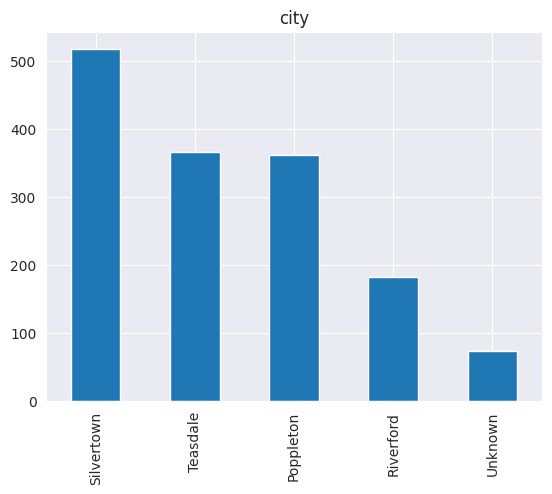

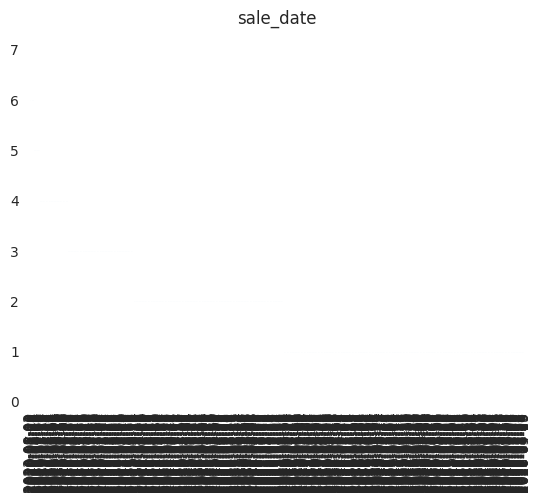

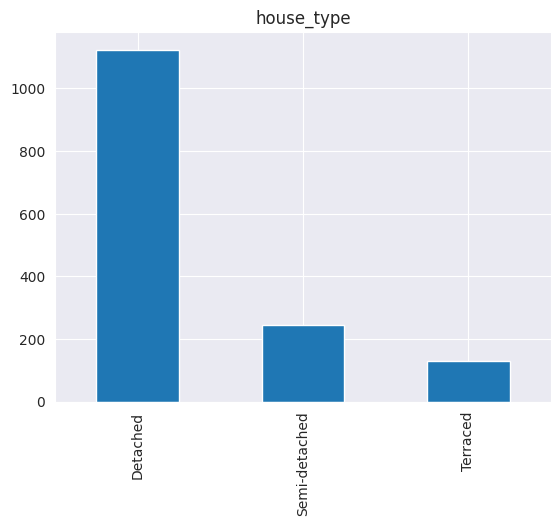

In [18]:
import matplotlib.pyplot as plt
# make a plot for the categorical variables
for column in clean_data.select_dtypes(include=['object']):
    clean_data[column].value_counts().plot(kind='bar', title=column)
    plt.show()

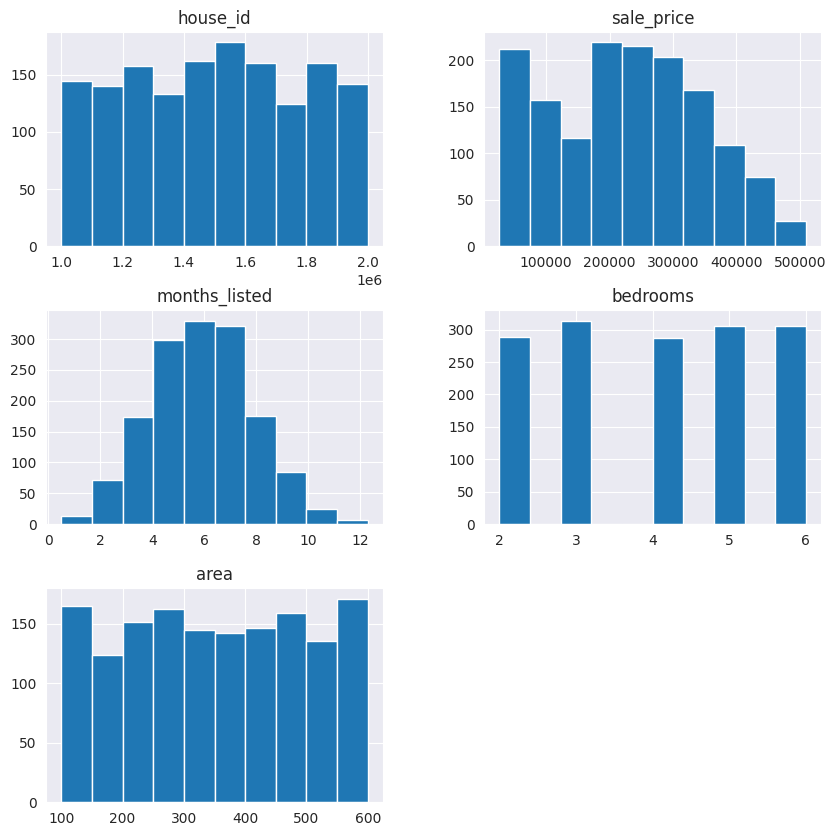

In [19]:
# Analysis of continuous variables
clean_data.hist(figsize=(10, 10))
plt.show()

# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

In [20]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1500 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1500 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 105.5+ KB


In [21]:
# Use this cell to write your code for Task 3
# Use this cell to write your code for Task 3
col = ["bedrooms", "avg_price", "var_price"]
price_by_rooms = clean_data.groupby("bedrooms")[["sale_price"]].agg(["mean", "var"])
price_by_rooms.reset_index(level=0, inplace=True)
price_by_rooms.head()

bedrooms     sale_price              
                     mean           var
0        2   67076.357639  5.652896e+08
1        3  154665.105096  2.378289e+09
2        4  234704.630662  1.725211e+09
3        5  301515.885246  2.484328e+09
4        6  375741.313725  3.924432e+09

In [22]:
price_by_rooms.columns = col
price_by_rooms["var_price"] = price_by_rooms["var_price"].apply(lambda x: round(x, 1))
price_by_rooms["avg_price"] = price_by_rooms["avg_price"].apply(lambda x: round(x, 1))
price_by_rooms.head()
#passed

,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [23]:
# Use this cell to write your code for Task 4
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
import numpy as np
train_data = pd.read_csv("train.csv")
validation_data = pd.read_csv("validation.csv")
print(train_data.isnull().sum())
print(validation_data.isnull().sum())

house_id         0
city             0
sale_price       0
sale_date        0
months_listed    0
bedrooms         0
house_type       0
area             0
dtype: int64
house_id         0
city             0
sale_date        0
months_listed    0
bedrooms         0
house_type       0
area             0
dtype: int64


In [24]:
X = train_data["bedrooms"]
y = train_data["sale_price"]
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = linreg.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2285394678.21265


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Define features and target
X = train_data[['city', 'months_listed', 'bedrooms', 'house_type', 'area']]
y = train_data['sale_price']
# Preprocessing for numerical and categorical data
numeric_features = ['months_listed', 'bedrooms', 'area']
categorical_features = ['city', 'house_type']

# Create transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create and fit the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))



Mean Squared Error: 550632502.5331371
R^2 Score: 0.9623057840585275
Root Mean Squared Error: 23465.55992370813


In [26]:
# let's use Linear Regression, but include the testing data to allow more data to fed to the training data
X = train_data[['city', 'months_listed', 'bedrooms', 'house_type', 'area']]
y = train_data['sale_price']
# Preprocessing for numerical and categorical data
numeric_features = ['months_listed', 'bedrooms', 'area']
categorical_features = ['city', 'house_type']

# Create transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create and fit the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X, y)

base_result = validation_data[['house_id']]
base_result['price'] = model.predict(validation_data[['city', 'months_listed', 'bedrooms', 'house_type', 'area']])
base_result.head()

/tmp/ipykernel_90522/1992045021.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_result['price'] = model.predict(validation_data[['city', 'months_listed', 'bedrooms', 'house_type', 'area']])


,house_id,price
0,1331375,121527.827316
1,1630115,304386.625267
2,1645745,384760.100656
3,1336775,123976.268985
4,1888274,271186.199353


# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create a pipeline with RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Evaluate and predict
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)
test_score = grid_search.score(X_test, y_test)
print(f'Test Score: {-test_score}')
y_pred = grid_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Best parameters found:  {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best score found:  204602310.9120734
Test Score: 217156976.03767064
Root Mean Squared Error: 14736.247013322987


In [28]:
# let's use RandomForestRegressor, but include the testing data to allow more data to fed to the training data
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100))
])

pipeline.fit(X, y)

validation_data = pd.read_csv("validation.csv")
validation_X = validation_data[['city', 'months_listed', 'bedrooms', 'house_type', 'area']]

pipeline_predictions = pipeline.predict(validation_X)
compare_result = validation_data[['house_id']].copy()
compare_result['price'] = pipeline_predictions
compare_result.head()

,house_id,price
0,1331375,81665.600085
1,1630115,308253.289541
2,1645745,401724.124486
3,1336775,108045.083406
4,1888274,265372.900586
